#112=IfcSegmentedReferenceCurve((#113),.F.,#89,#130)


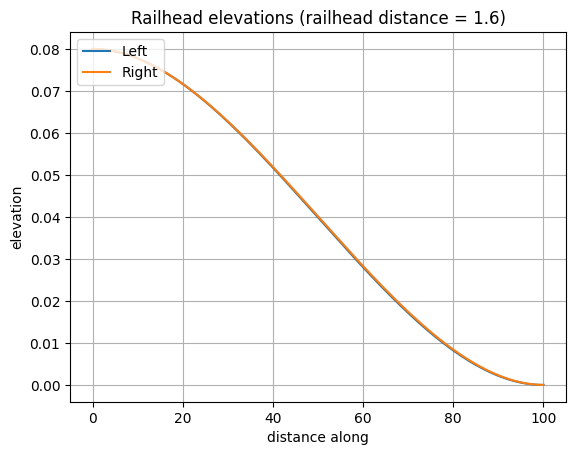

In [3]:
import ifcopenshell, ifcopenshell.geom
import numpy as np
import matplotlib.pyplot as plt

f = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__CantAlignment_BlossCurve_100.0_300_1000_1_Meter.ifc")
inst = f.by_type('IfcSegmentedReferenceCurve')[0]
print(inst)
pwf = ifcopenshell.ifcopenshell_wrapper.map_shape(ifcopenshell.geom.settings(),inst.wrapped_data)
rail_head = 1.6
locations = pwf.evaluation_points()
left = []
right = []
for u in locations:
    m = pwf.evaluate(u)
    z = np.array(m)[:,3][2] # get the curve elevation
    axis = np.array(m)[:,2] # get the Axis vector
    dy = axis[1]
    dz = axis[2]
    left.append(-0.5*rail_head*dy/dz + z)
    right.append(0.5*rail_head*dy/dz + z)

fig1 = plt.figure().add_subplot()
fig1.plot(locations,left,label="Left")
fig1.plot(locations,right,label="Right")
            
fig1.set_title("Railhead elevations (railhead distance = " + str(rail_head) +")")
fig1.legend(loc="upper left")
fig1.set_xlabel("distance along")
fig1.set_ylabel("elevation")
fig1.grid(True)
plt.show()
